# Kalman filter for non linear functions - X^2

Given state analysis - $f(x) = x^2$
modeling the state , 
$$ f(x + \delta x) = x^2 + 2 x\delta x + (\delta x)^2$$
$$ f(x + \delta x) = f(x) + 2 \sqrt{f(x)}\delta x + (\delta x)^2$$

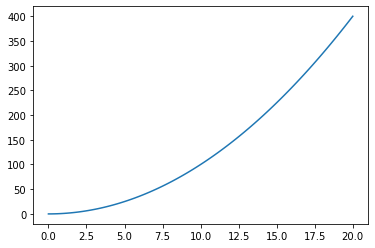

In [19]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,20,100)
y = np.multiply(x , x)

plt.plot(x,y)

## Adding variance

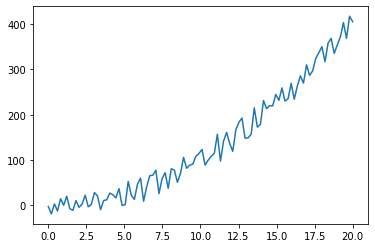

In [25]:
import random
reading_variance = 30

for i in range(len(y)):
    y[i] += random.uniform(-reading_variance,reading_variance)

plt.plot(x,y)

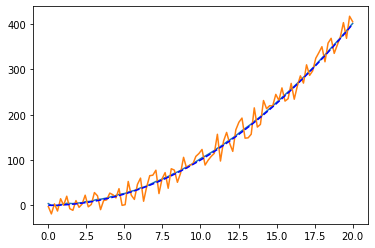

In [32]:
import math
X = 5
variance= 10

def predict(X,dx):
    if X < 0:
        return 0
    return X + (2*dx*math.sqrt(X)) + (dx*dx)

def update(reading_mean,reading_variance ,current_x,current_variance , dt):
    prediction_mean = predict(current_x,dt)
    k = current_variance/(current_variance + reading_variance)
    current_x = prediction_mean + k*(reading_mean - prediction_mean)
    current_variance = current_variance - (k*current_variance)
    return current_x , current_variance

predicted_y = []
dt = 1/5
for i in range(len(y)):
    X , variance = update(y[i],reading_variance,X,variance,dt)
    predicted_y.append(X)    


plt.plot(x,predicted_y)
plt.plot(x,y)
oldy = np.multiply(x , x)
plt.plot(x,oldy,linestyle = "dashed" , c = "blue")